# Logistic Regression from Scratch

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Read dataset

In [2]:
path = './dataset'
file_name = 'ex2data1.txt'
dataset = pd.read_csv(os.path.join(path, file_name), header=None)
dataset.columns = ['exam1', 'exam2', 'decision']
dataset.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### Dataset Information

In [3]:
X = dataset.values[:, :2]
y = dataset.values[:, 2]

print('Number examples: ', X.shape)
print('Number of features: ', X.shape[1])
print(X.shape)
print(y.shape)

Number examples:  (100, 2)
Number of features:  2
(100, 2)
(100,)


## Logistic Regression: non-regularized

### Necessary method implementation

#### Sigmoid function

In [4]:
def sigmoid(z):
    """ Return the sigmoid of the z """
    return 1 / ( 1 + np.exp(-z) )


def feature_normalizations(X):
    """ Normalize features """
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    
    return X, mean, std


def compute_cost(X, y, theta):
    """ Calculate cost and gradient """
    m = X.shape[0]
#     print(X.shape)
#     print(theta.shape)
    
    
    Z = np.dot(X, theta.T)
    hx = sigmoid(Z)
#     print(hx.shape)
    cost = -(1/m) * np.sum((y * np.log(hx) + (1-y) * np.log(1-hx)), axis=0)
    
    grad = (1/m) * np.dot((hx-y).T, X)
    return cost[0], grad


def gradient_descent(X, y, theta, learning_rate, iterations):
    """ Gradient descent """
    costs = np.zeros(iterations)
    for i in range(iterations):
        cost, grad = compute_cost(X, y, theta)
        theta = theta - learning_rate * grad
        costs[i] = cost
    return costs, theta

#### Feature normalizing

In [5]:
x_norm, mean, std = feature_normalizations(X)    

#### Setup variables 

In [6]:
learning_rate = 0.01
iterations = 400

# Add intercept term
xtrain = np.hstack((np.ones((X.shape[0],1)),x_norm))

# Initialize parameter theta
theta = np.zeros((1, xtrain.shape[1]))

# Compute cost and gradient to check
cost,grad = compute_cost(xtrain,y.reshape(-1,1), theta)


#### Training with LR

In [7]:
costs, up_theta = gradient_descent(xtrain, y, theta, learning_rate, iterations)

## Regularized Logistic Regression

#### Read dataset

In [8]:
path = './dataset'
file_name = 'ex2data2.txt'
dataset = pd.read_csv(os.path.join(path, file_name), header=None)
dataset.columns = ["test_1","test_2","result"]
dataset.head()

,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


#### Dataset information

In [9]:
featureset = dataset.values[:, :2]
target = dataset.values[:, 2].reshape(-1, 1)
print(featureset.shape)
print(target.shape)

(118, 2)
(118, 1)


#### Visualizing dataset by ploting

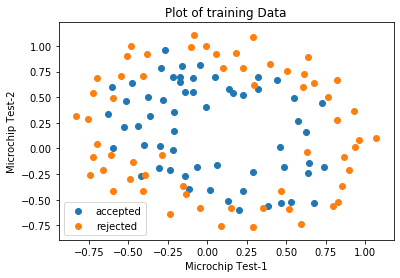

In [10]:
ones = featureset[target[:,0]==1]
zeros = featureset[target[:,0]==0]

plt.scatter(ones[:,0], ones[:,1])
plt.scatter(zeros[:,0], zeros[:, 1])

plt.xlabel("Microchip Test-1")
plt.ylabel("Microchip Test-2")
plt.title("Plot of training Data")
plt.legend(["accepted",'rejected'])

#### Feature mapping

In [11]:
def feature_mapping(X1, X2):
    """ Mapped feature """
    degree = 6
    if X1.ndim > 0:
            out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [12]:
def compute_regularized_cost(X, y, thetas, _lambda):
    m = y.shape[0]
#     print(X.shape)
#     print(thetas.shape)
    
    Z = np.dot(X, thetas.T)
    hx = sigmoid(Z)
    error = -y*np.log(hx) - (1-y) * np.log(1-hx)
    cost = (1/m) * np.sum(error, axis=0)
    reg_cost = cost + _lambda/(2*m) * np.sum( np.power(thetas[:,1:], 2), axis=1 )
    
    grad_0 = np.dot( X[:,0].T, (hx-y) )/m
#     print('======')
#     print((np.dot(X[:,1:].T, (hx-y))/m).shape)
#     print(((_lambda/m)*thetas[:, 1:]).shape)
    grad_1 = (np.dot(X[:,1:].T, (hx-y))/m).T + ((_lambda/m)*thetas[:, 1:])
#     print(grad_0.shape)
#     print(grad_1.shape)
    
    grad = np.append(grad_0, grad_1.flatten()).reshape(1, -1)
    
    return reg_cost[0], grad

In [13]:
def reg_gradient_descent(X, y, thetas, learning_rate, _lambda, iteraions):
    costs = np.zeros(iterations)
    
    for i in range(iterations):
        cost, grad = compute_regularized_cost(X, y, thetas, _lambda)
        thetas = thetas - learning_rate * grad
        costs[i] = cost
    return costs, thetas

In [14]:
mapped_feature = feature_mapping(featureset[:, 0], featureset[:, 1])


In [15]:
X = mapped_feature
y = target
theta = np.zeros( (1,X.shape[1]) )
iterations = 500
learning_rate = 0.5
_lambda = 1
# costs, thetas = gradient_descent(X, y, theta, alpha, _lambda, iterations)
cost, thetas = compute_regularized_cost( X, y, theta, _lambda)

In [16]:
costs, up_thetas = reg_gradient_descent(X, y, theta, learning_rate, _lambda, iterations)

In [17]:
up_thetas.shape

(1, 28)

#### Ploting cost function

Text(0.5, 1.0, 'Cost reducing graph per iteration')

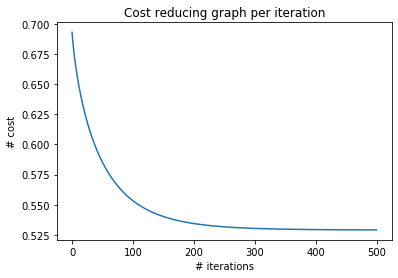

In [18]:
plt.plot(costs)
plt.xlabel('# iterations')
plt.ylabel('# cost')
plt.title('Cost reducing graph per iteration')

#### Accuracy calculation

In [19]:
def prediction(X, thetas):
    p = sigmoid(np.dot(X, thetas.T))
    return p>=0.5

In [20]:
pred_y = prediction(X, up_thetas)

In [21]:
print("Training accuracy: ", np.mean(y==pred_y))

Training accuracy:  0.8305084745762712


#### Visualize learned decesion boundary 

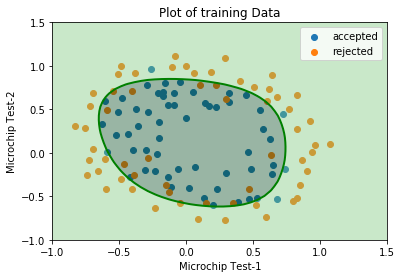

In [22]:
ones = featureset[target[:,0]==1]
zeros = featureset[target[:,0]==0]


plt.scatter(ones[:,0], ones[:,1])
plt.scatter(zeros[:,0], zeros[:, 1])

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(feature_mapping(ui, vj), up_thetas.flatten())

z = z.T  # important to transpose z before calling contour
# print(z)

# Plot z = 0
plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

plt.xlabel("Microchip Test-1")
plt.ylabel("Microchip Test-2")
plt.title("Plot of training Data")
plt.legend(["accepted",'rejected'])
